<a href="https://colab.research.google.com/github/CSheppardCodes/Scholastic-Study-of-Data-Science/blob/main/SGDRegressorOLSAbalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CSheppardCodes/MLDatasetsUCI/main/abalone/abalone.data")

In [ ]:
df.head()

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# one hot encoding

In [ ]:
abalone_cat = df[['Sex']]
abalone_cat.head()

,Sex
0,M
1,M
2,F
3,M
4,I


In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
catencoder = OneHotEncoder(sparse_output=False)
abalone_cat_1hot = catencoder.fit_transform(abalone_cat)
abalone_cat_1hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
abalone_cat_1hot_df = pd.DataFrame(abalone_cat_1hot, columns=catencoder.get_feature_names_out(input_features=abalone_cat.columns))
abalone_encoded = pd.concat([df, abalone_cat_1hot_df], axis=1)
abalone_encoded = abalone_encoded.drop(abalone_cat.columns, axis=1)
abalone_encoded.head()

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


# Corr matrix

In [ ]:
corr_matrix = abalone_encoded.corr()

In [ ]:
corr_matrix['Rings'].sort_values(ascending=False)

Rings      1.000000
Shell      0.627574
Diam       0.574660
Height     0.557467
Length     0.556720
Whole      0.540390
Viscera    0.503819
Shucked    0.420884
Sex_F      0.250279
Sex_M      0.181831
Sex_I     -0.436063
Name: Rings, dtype: float64

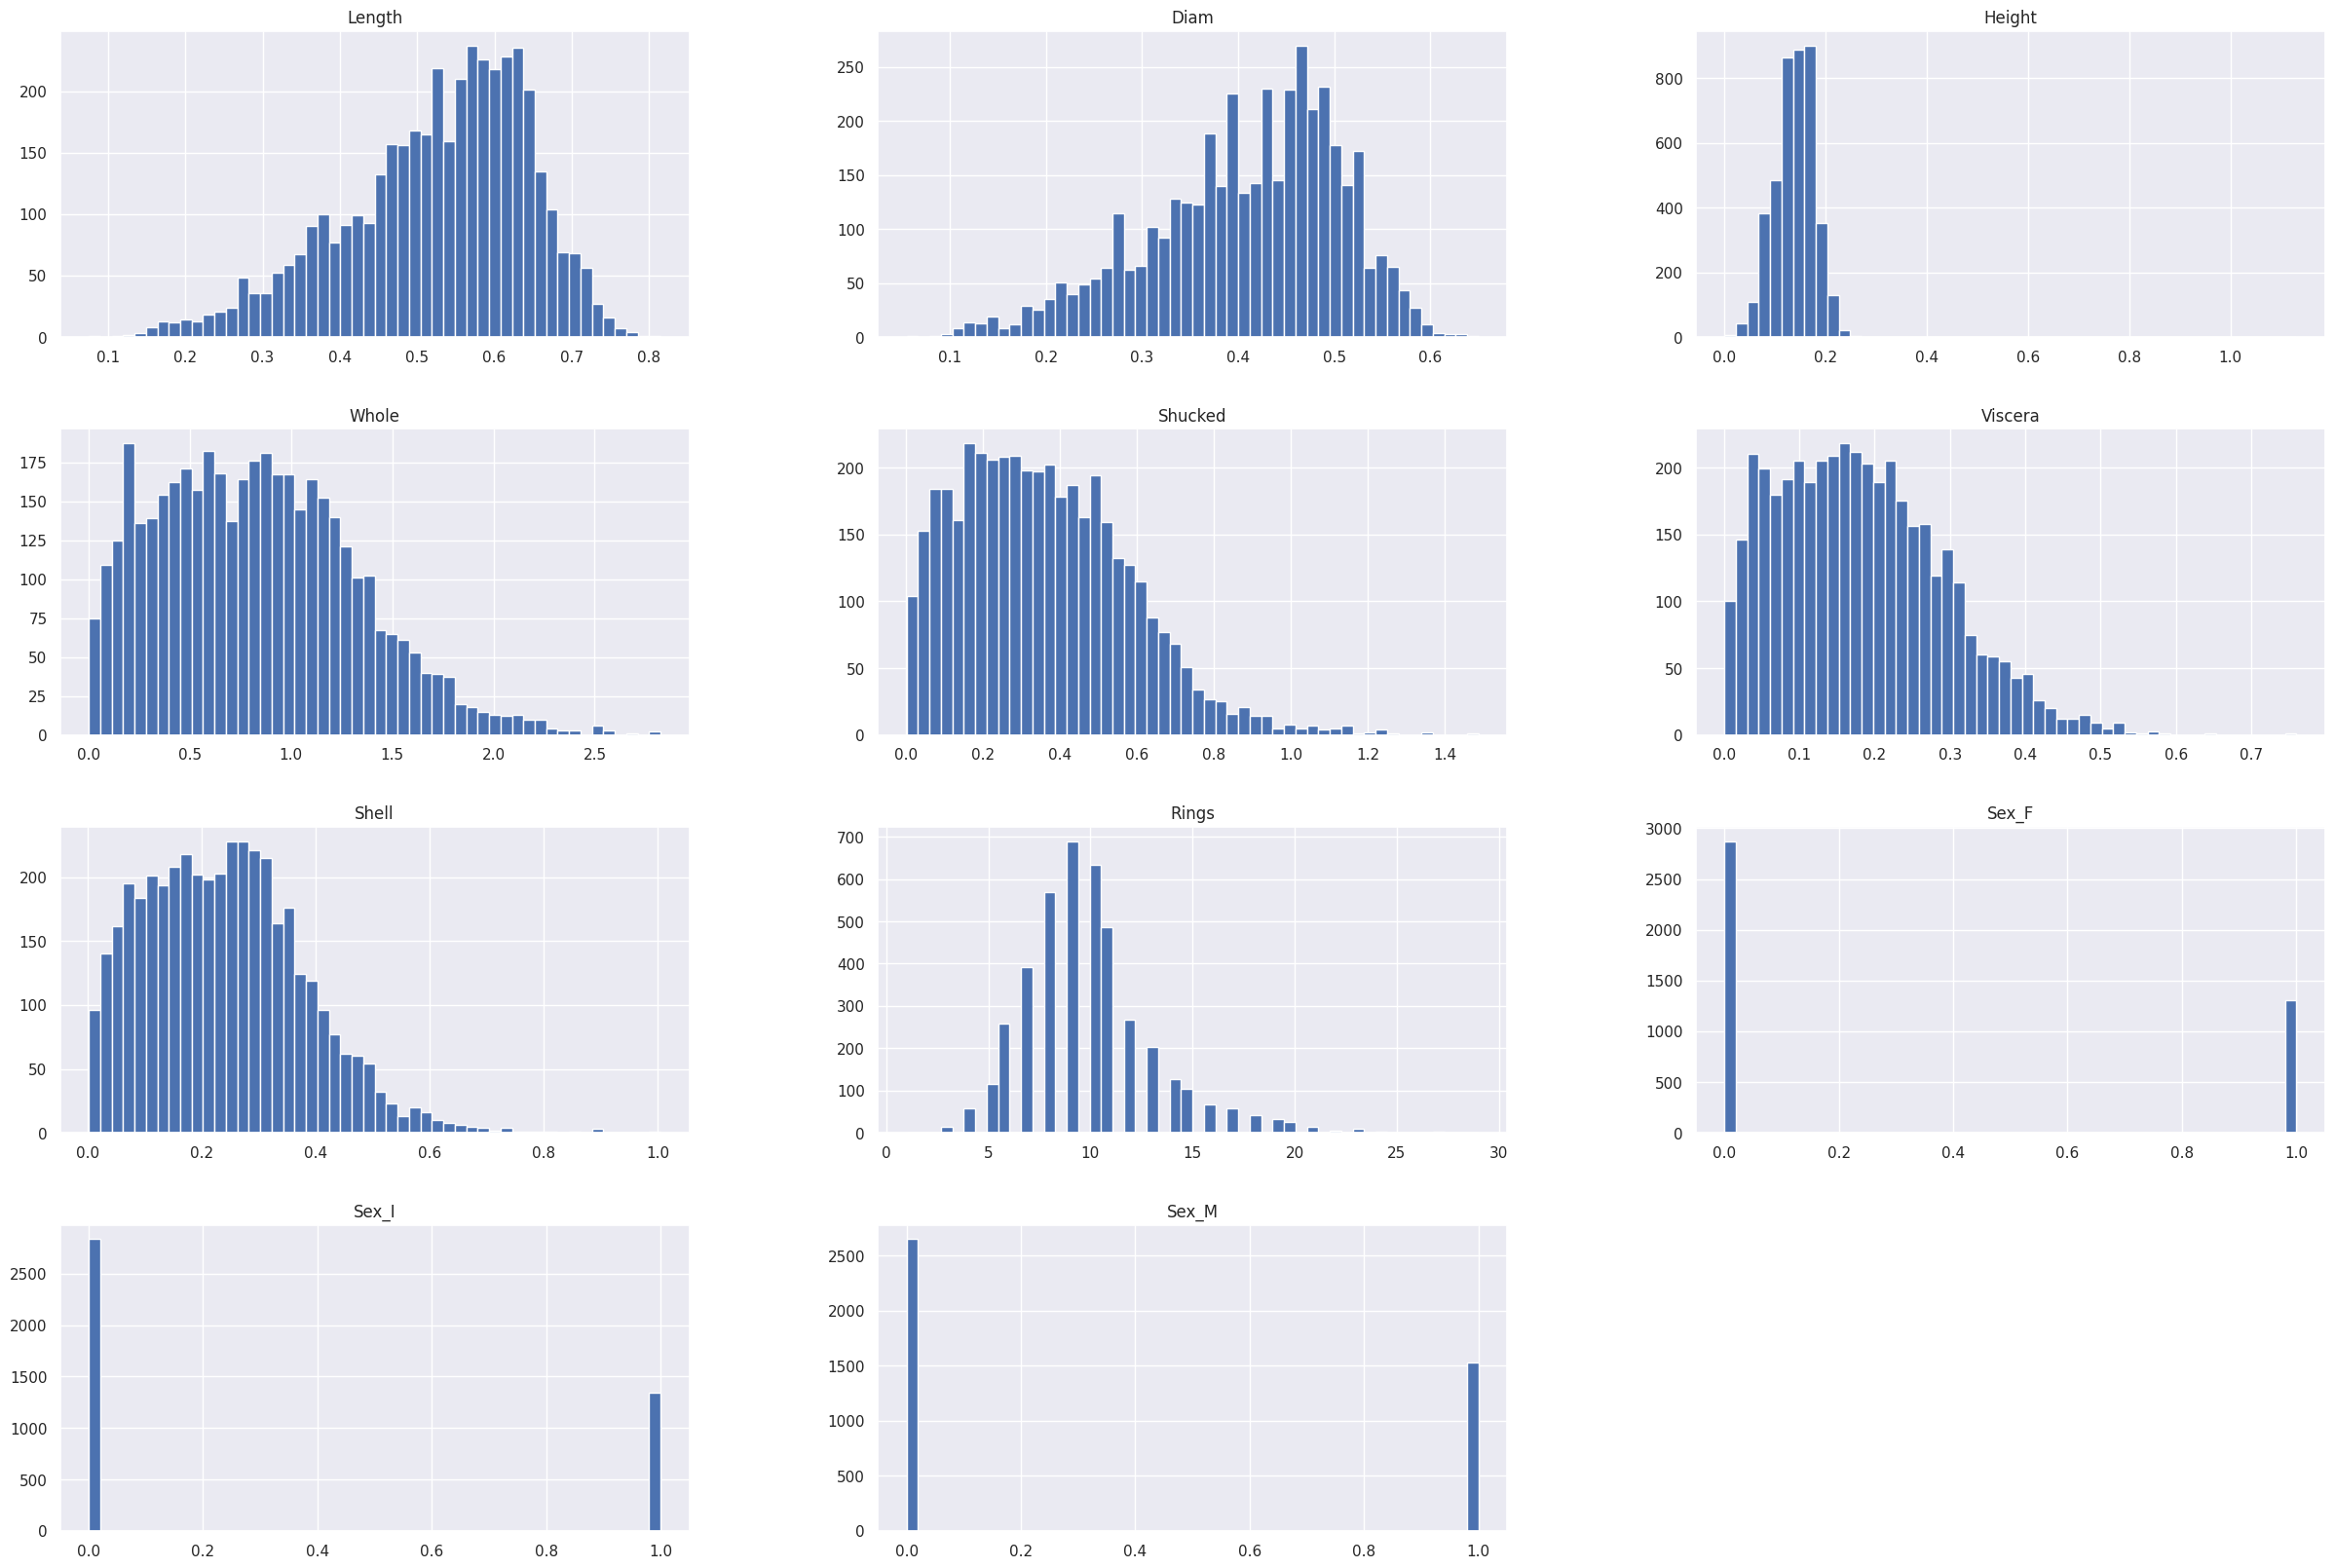

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
abalone_encoded.hist(bins=50,figsize=(30,20))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import sklearn.datasets._california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline


<Axes: >

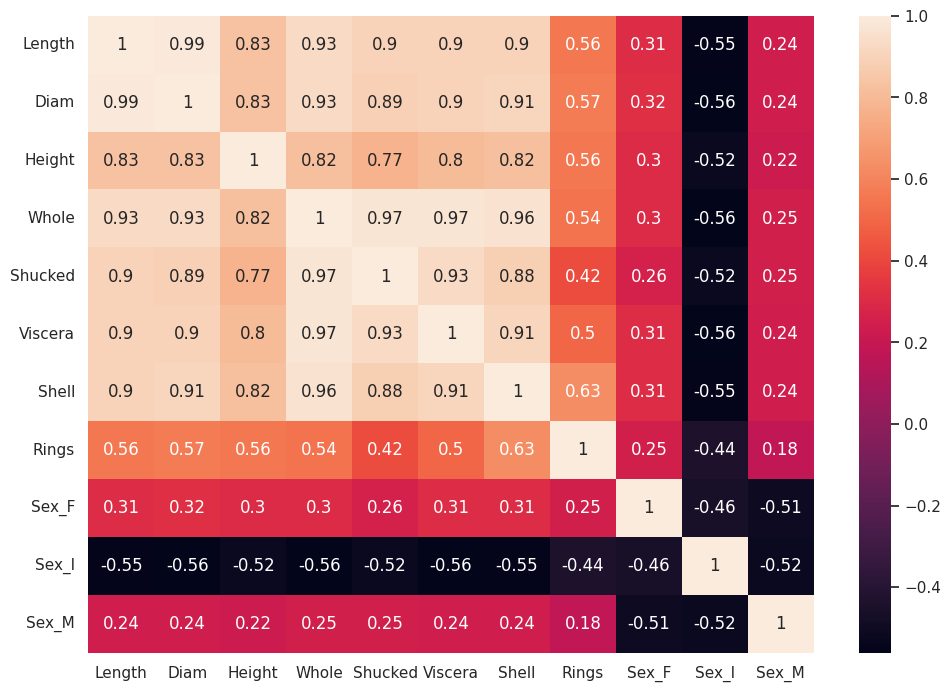

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = abalone_encoded.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# SDG REGRESSOR

In [ ]:
nonencode = abalone_encoded[["Length", "Diam", "Height", "Whole", "Shucked", "Viscera", "Shell"]]#
wholeting = abalone_encoded[["Sex_F", "Sex_I", "Sex_M"]]

In [ ]:
s = StandardScaler()
X = pd.DataFrame(s.fit(nonencode).fit_transform(nonencode), columns = nonencode.columns)

In [ ]:
concatenated_df = pd.concat([X, wholeting], axis=1)
Y = abalone_encoded['Rings']

In [ ]:
concatenated_df.head()

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0.0,0.0,1.0
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0.0,0.0,1.0
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1.0,0.0,0.0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.0,0.0,1.0
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(concatenated_df, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3341, 10)
(836, 10)
(3341,)
(836,)


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error


In [ ]:
# 0. Default Learning Rate: Default inverse scaling learning rate (eta0=0.01 and power_t=0.25).
lin_model = SGDRegressor()#learningrate,maximumiterations,loss,penalty

# # 1. Fixed learning rate throughout training.
# lin_model = SGDRegressor(learning_rate='constant', eta0=0.02)  # eta0 is the initial learning rate.

# # 2. Automatically adjusts learning rate based on alpha parameter.
# lin_model = SGDRegressor(learning_rate='optimal', alpha=0.0001)  # alpha multiplies the regularization term.

# # 3. Learning rate decreases progressively.
# lin_model = SGDRegressor(learning_rate='invscaling', eta0=0.02, power_t=0.25)
# # eta0 is the initial learning rate, and power_t is the exponent for inverse scaling.

# # 4. Learning rate decreases progressively.
# lin_model = SGDRegressor(learning_rate='invscaling', eta0=0.02, power_t=0.1)

# # 5. Learning rate decreases progressively.
# lin_model = SGDRegressor(learning_rate='invscaling', eta0=0.02, power_t=0.5)

# # 6. Learning rate adapts to training progress.
# lin_model = SGDRegressor(learning_rate='adaptive', eta0=0.01)

# # 7. max_iter int, default=1000
# lin_model = SGDRegressor(max_iter = 500)

# # 8. max_iter int, default=1000
# lin_model = SGDRegressor(max_iter = 5000)

# # 9. lossstr: default=’squared_error’
# lin_model = SGDRegressor(loss = 'huber')#bad

# # 10. lossstr: default=’squared_error’
# lin_model = SGDRegressor(loss = 'epsilon_insensitive')#terrible

# # 11. lossstr: default=’squared_error’
# lin_model = SGDRegressor(loss = 'squared_epsilon_insensitive')#good

# # 12. penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’
# lin_model = SGDRegressor(penalty = 'l1')#ok

# # 13. penalty{‘l2’, ‘l1’, ‘elasticnet’, None}, default=’l2’
# lin_model = SGDRegressor(penalty = 'elasticnet')#ok

# eta0 is the initial learning rate; adaptation depends on the training loss.

#lin_model = SGDClassifier()
lin_model.fit(X_train, Y_train)

SGDRegressor()

In [ ]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.1756850107800965
R2 score is 0.5431487658427192


The model performance for testing set
--------------------------------------
RMSE is 2.3255858866019747
R2 score is 0.4856177768955777


#OLS

In [ ]:
#-----------for more in-depth diagnostics ----------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train_off = sm.add_constant(X_train)
smRegression = sm.OLS(Y_train, X_train_off)

model = smRegression.fit()
print(model.summary())


ypred = model.predict(X_train_off)
rmse = sm.tools.eval_measures.rmse(Y_train, ypred)
print('RMSE is:')
print(rmse)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     448.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        03:31:09   Log-Likelihood:                -7321.4
No. Observations:                3341   AIC:                         1.466e+04
Df Residuals:                    3331   BIC:                         1.472e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4448      0.028    263.902      0.0